### Example Usage


Possible insufficient data for correction. Zero count: 1563


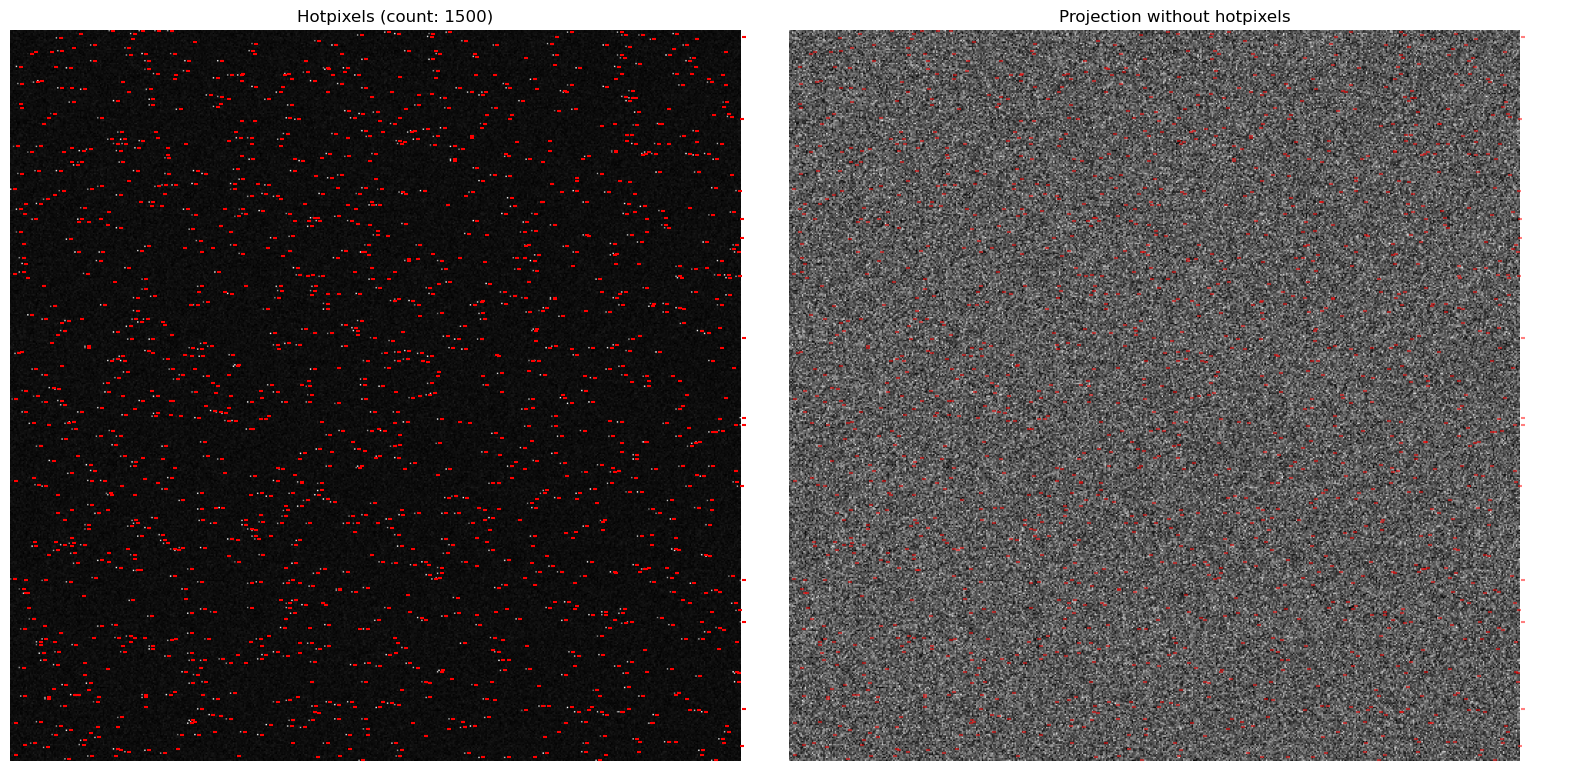

In [2]:
from spadtools import SPADFile, SPADData, GenerateTestData, SPADHotpixelTool
from copy import deepcopy
from typing import cast


test_image = GenerateTestData()
hotpixel = SPADHotpixelTool(test_image.generate())
hotpixel.inspect(hp_threshold=1.5)
# This will retun an warning as the number of frame is small

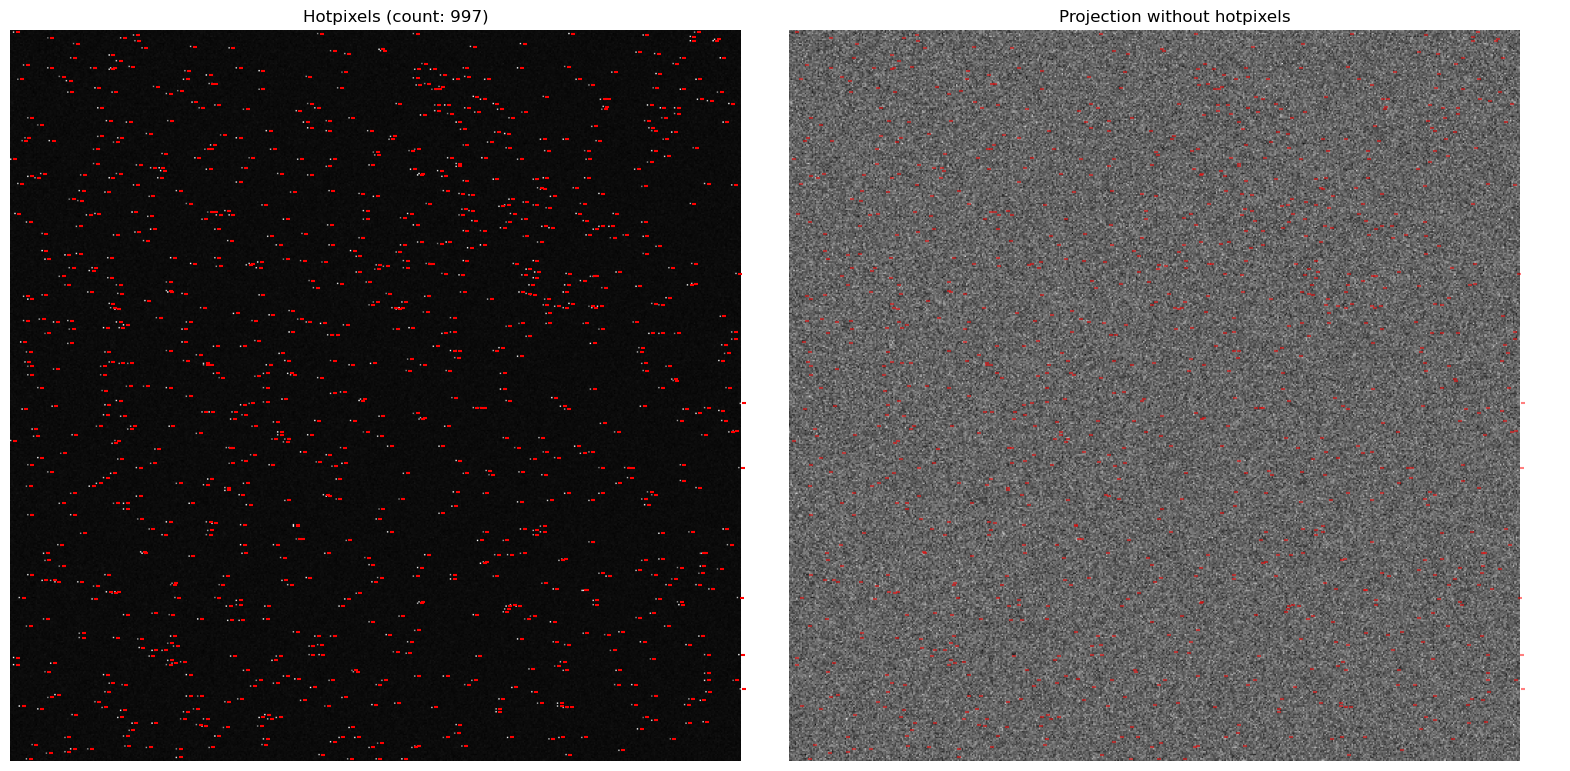

In [4]:
test_image.z_size = 400
hotpixel = SPADHotpixelTool(test_image.generate())
hotpixel.inspect(hp_threshold=1.5)  # no more errors

### Test dummy data generation

In [5]:
# This can take a while
test_image.z_size = 100
test_data_path = test_image.create()
test_dataset = SPADFile(test_data_path, load_data=True)

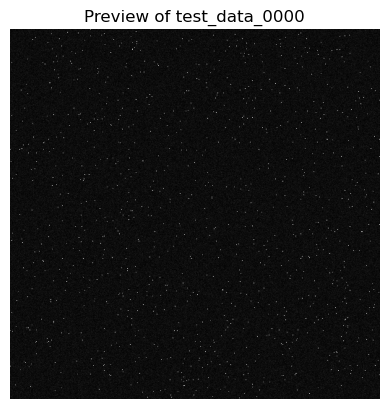

In [6]:
preview_image = test_dataset[0].preview(plot=True)

In [7]:
# Clean up the dummy data
test_image.remove() 

In [8]:
# Concatenate the first 10 frames
data = cast(SPADData, deepcopy(test_dataset[0]))
for f in test_dataset[1:10]:
    data += cast(SPADData, f)
print(test_dataset[0].data.shape)
print(data.data.shape)

(100, 512, 512)
(1000, 512, 512)
